# Machine Learning

### Introduction

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np


### Import data

First, we import the data from the heart dataset that we got and we use a function called "read_csv()" from the pandas library to load the data. We give each attribute a name then we show the five-row in the data.

In [5]:
df = pd.read_csv("heart2.csv")
var_columns = [c for c in df.columns]

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Missing data

After that, we look for any missing data that could be in the dataset, in this case, we go through every column and each value that is in the column then if there is any missing data it will print how many missing values besides the column name that have missing data.

In [38]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Split the data

Now we must split the examples from the target in order to train and test the model.

In [39]:
x = df.drop('target', axis='columns')
y = df['target']

x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [40]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Dealing with categorical data

after we split the data we face a problem that in some columns, for instance, chest pain column its categorical means it has four types not only two so we have to encode it and we use "One-hot encode" that will convert to binary value zero and one but it will create another column, by using "get_dummies" function we could able to do it for chest pain column and the rest that have to be encoded.

In [41]:
x_encoded = pd.get_dummies(x, columns = ['cp','thal','ca','slope','restecg'])
x_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,ca_1,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,0,...,0,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,0,0,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,0,0,0,0,1,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,0,0,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,0,0,0,0,0,1,0,1,0


### Classifier

First, we split the data into 70% to train the model and 30% to test the model, then we calculate the accuracy and we got 100% train data accuracy and 80.0% test data accuracy, you can see that the data having overfitting since the training accuracy is a lot greater than test accuracy, then we show the tree that have size 77 which is huge.

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=2)

tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=0)

tree_clf = tree_clf.fit(x_train,y_train)

y_predict_test = tree_clf.predict(x_test)
y_predict_train = tree_clf.predict(x_train)

print(f'Accuracy of the training sample = {accuracy_score(y_train, y_predict_train)*100}%')
print(f'Accuracy of the test sample = {round(accuracy_score(y_test, y_predict_test), 2)*100}%')

print("Tree size:",tree_clf.tree_.node_count)

Accuracy of the training sample = 100.0%
Accuracy of the test sample = 80.0%
Tree size: 77


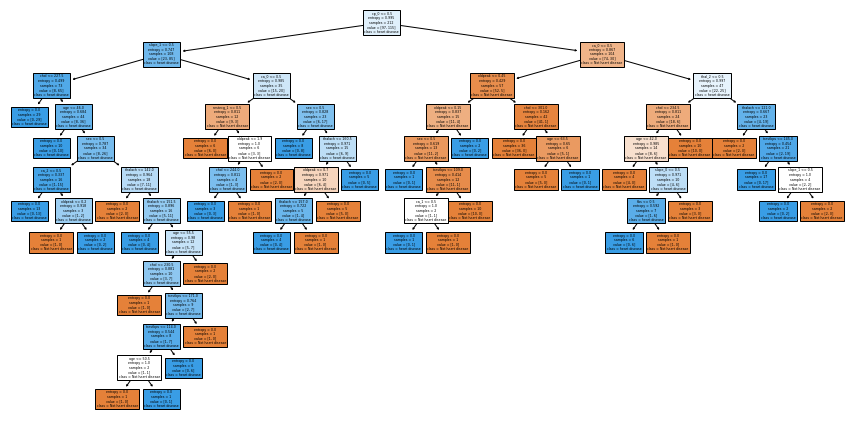

In [43]:
plt.figure(figsize=[15,7.5])
plot_tree(tree_clf,filled= True,class_names=['Not heart disease','heart disease'], feature_names= x_encoded.columns)
plt.show()

### Confusion matrix

Here is the confusion matrix for train, test data that will help us to find out how many the model failed to classify correctly.

confusion Matrix (Train)


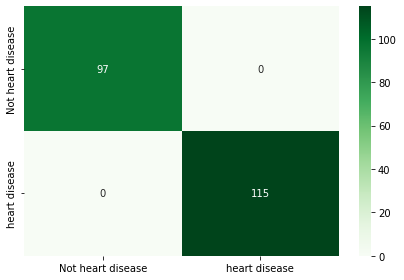

confusion Matrix (Test)


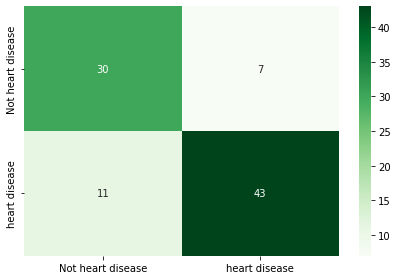

In [44]:
cf_train = metrics.confusion_matrix(y_predict_train,y_train)
cf_test = metrics.confusion_matrix(y_predict_test,y_test)
sn.heatmap(cf_train,annot=True,yticklabels=['Not heart disease','heart disease'],xticklabels=['Not heart disease','heart disease'],cmap='Greens', fmt='g')

print("confusion Matrix (Train)")

plt.tight_layout()
plt.show()
print("confusion Matrix (Test)")
sn.heatmap(cf_test,annot=True,yticklabels=['Not heart disease','heart disease'],xticklabels=['Not heart disease','heart disease'],cmap='Greens', fmt='g')

plt.tight_layout()
plt.show()

### Precision and Recall

we can calculate precision and recall for train data as well as test data.

In [45]:
print(f'Train precision: {metrics.precision_score(y_train, y_predict_train)}')
print(f'Train recal: {metrics.recall_score(y_train, y_predict_train)}')
print(f'Test precision: {round(metrics.precision_score(y_test, y_predict_test), 2)}')
print(f'Test recal: {round(metrics.recall_score(y_test, y_predict_test), 2)}')

Train precision: 1.0
Train recal: 1.0
Test precision: 0.8
Test recal: 0.86


In [46]:
path = tree_clf.cost_complexity_pruning_path(x_train, y_train)
alphas = path['ccp_alphas']

alphas

array([0.        , 0.00943396, 0.00943396, 0.01071212, 0.01272793,
       0.0130276 , 0.01398963, 0.01415094, 0.01423022, 0.01455739,
       0.01607948, 0.01702661, 0.01732932, 0.01761952, 0.01886792,
       0.01953637, 0.0212153 , 0.02276294, 0.02393827, 0.02426988,
       0.02607568, 0.02678057, 0.02689795, 0.02737386, 0.02974337,
       0.04623314, 0.05688584, 0.08884652, 0.18900507])

In [47]:
acc_train = []
acc_test = []
tree_size = []
tree_depth = []
alpha_values = []

for alpha in alphas:
    temp_tree = DecisionTreeClassifier(ccp_alpha=alpha)
    temp_tree.fit(x_train, y_train)

    y_predect_train, y_predect_test = temp_tree.predict(x_train), temp_tree.predict(x_test)
    
    scores = cross_val_score(temp_tree,x_train,y_train,cv=5)#########
    
    alpha_values.append([alpha,np.mean(scores),np.std(scores)])
    tree_depth.append(temp_tree.get_depth())
    tree_size.append(temp_tree.tree_.node_count)
    acc_train.append(accuracy_score(y_train, y_predect_train))
    acc_test.append(accuracy_score(y_test, y_predect_test))

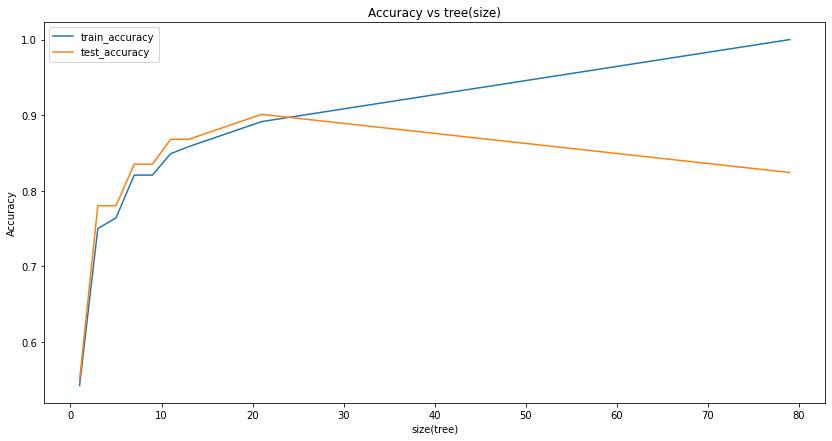

In [48]:
plt.figure(figsize=(14,7))
plt.plot(tree_size,acc_train,label='train_accuracy')
plt.plot(tree_size,acc_test,label='test_accuracy')
plt.legend()
plt.xlabel("size(tree)")
plt.ylabel("Accuracy")
plt.title('Accuracy vs tree(size)')
plt.show()

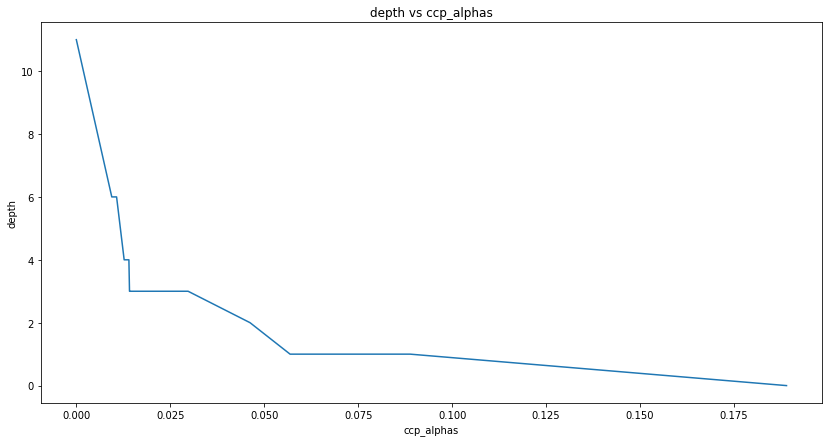

In [49]:
plt.figure(figsize=(14,7))
plt.plot(alphas,tree_depth)
plt.xlabel("ccp_alphas")
plt.ylabel("depth")
plt.title('depth vs ccp_alphas')
plt.show()

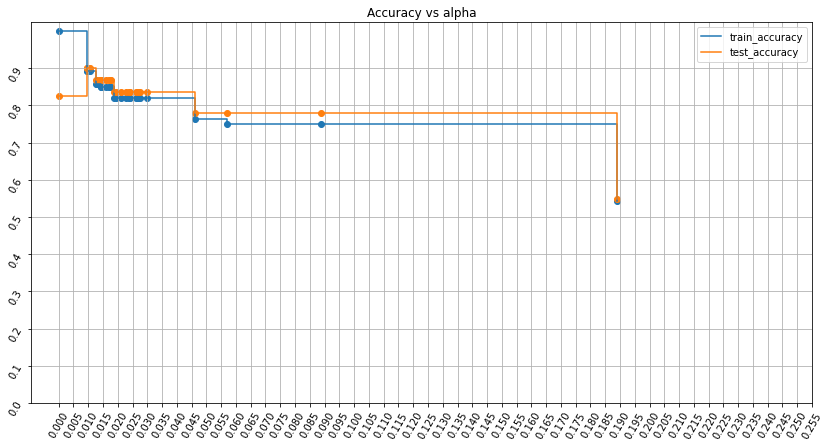

In [50]:
plt.figure(figsize=(14,7))
plt.scatter(alphas,acc_train)
plt.scatter(alphas,acc_test)
plt.plot(alphas,acc_train,label='train_accuracy',drawstyle="steps-post")
plt.plot(alphas,acc_test,label='test_accuracy',drawstyle="steps-post")
plt.xticks(ticks=np.arange(0.00,0.26,0.005), rotation=60)
plt.yticks(ticks=np.arange(0.00,1.00,0.1), rotation=60)
plt.legend()

plt.title('Accuracy vs alpha')
plt.grid()
plt.show()

<AxesSubplot:xlabel='alpha'>

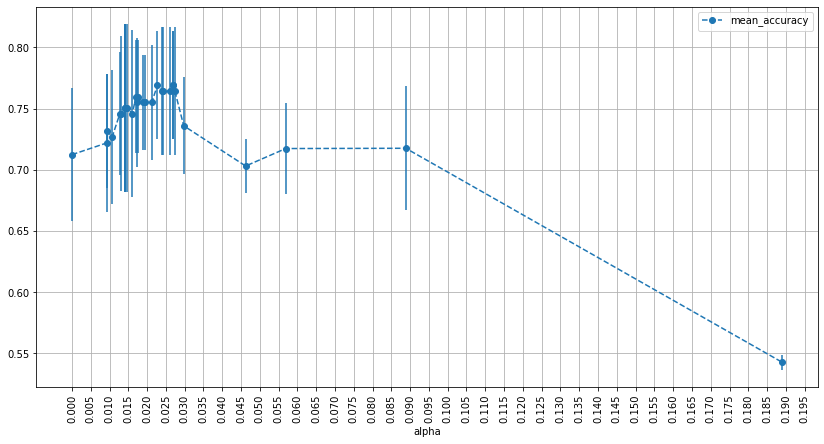

In [51]:
alpha_result = pd.DataFrame(alpha_values,columns=['alpha','mean_accuracy','std'])
alpha_result.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--', figsize=(14,7), xticks=np.arange(0,0.2,0.005), grid=True, rot=90)

In [52]:
alpha_result[(alpha_result['alpha']>0.010)
             &
             (alpha_result['alpha']<0.013)]

,alpha,mean_accuracy,std
3,0.010712,0.726800,0.054666
4,0.012728,0.745626,0.050339


In [53]:
tree_clf = DecisionTreeClassifier(random_state=0,ccp_alpha=0.010712)
tree_clf = tree_clf.fit(x_train,y_train)

y_predict_test1 = tree_clf.predict(x_test)
y_predict_train1 = tree_clf.predict(x_train)

print(f'Accuracy of the training sample = {accuracy_score(y_train, y_predict_train1)*100}%')
print(f'Accuracy of the test sample = {round(accuracy_score(y_test, y_predict_test1), 2)*100}%')

Accuracy of the training sample = 89.15094339622641%
Accuracy of the test sample = 90.0%


confusion Matrix (Train)


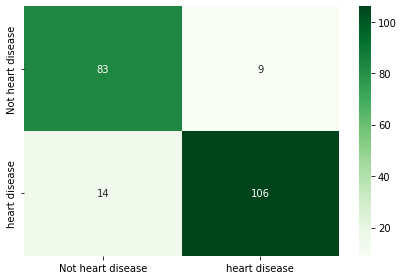

confusion Matrix (Test)


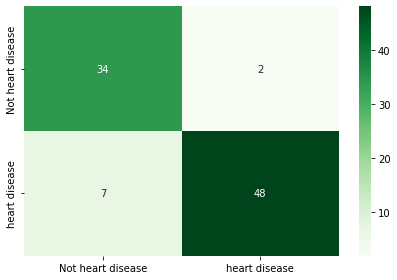

In [54]:
cf_train = metrics.confusion_matrix(y_predict_train1,y_train)
cf_test = metrics.confusion_matrix(y_predict_test1,y_test)
sn.heatmap(cf_train,annot=True,yticklabels=['Not heart disease','heart disease'],xticklabels=['Not heart disease','heart disease'],cmap='Greens', fmt='g')

print("confusion Matrix (Train)")

plt.tight_layout()
plt.show()
print("confusion Matrix (Test)")
sn.heatmap(cf_test,annot=True,yticklabels=['Not heart disease','heart disease'],xticklabels=['Not heart disease','heart disease'],cmap='Greens', fmt='g')

plt.tight_layout()
plt.show()

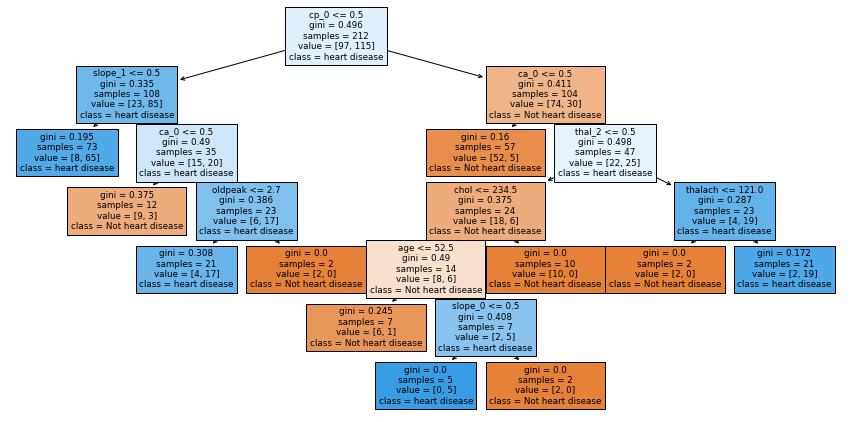

In [55]:
plt.figure(figsize=[15,7.5])
plot_tree(tree_clf,filled= True,class_names=['Not heart disease','heart disease'], feature_names= x_encoded.columns)
plt.show()